# Lab 3: RF Planning

In this lab, you will perform basic RF planning for the teleoperation use case on the Smart Highway. The main goal of RF planning is to evaluate the capacity and coverage of the Radio Access Network (RAN) given a variety of parameters and configuration options related to wave propagation.

In [1]:
import math
from tdd_pattern_plotter import plot_tdd_pattern

In [2]:
# Some helper functions that could be useful for the exercises
def ratio_to_db(power_ratio):
    return 10. * math.log10(power_ratio)


def db_to_ratio(dB):
    return 10 ** (dB / 10)


def dbm_to_w(dBm):
    return 10 ** (dBm / 10) / 1000


def w_to_dbm(power_in_W):
    return ratio_to_db(power_in_W * 1000)

## RF Planning

### Boundary Conditions

Since the configuration space is nearly infinite, we provide the following boundary conditions and assumptions to make things easier:
- Use Transmission Mode 1 (TM1; Single Input Single Output (SISO))
- Use a Time Division Duplex (TDD) frequency band below $4\ \mathrm{GHz}$;
- Use a bandwidth of maximum $40\ \mathrm{MHz}$;
- The UE has a maximum transmit power of $0.1\ \mathrm{W}$ in $40\ \mathrm{MHz}$;
- The RSU has a maximum transmit power of $1\ \mathrm{W}$ in $40\ \mathrm{MHz}$ (for completeness' sake; you only have to do Uplink (UL) planning, no Downlink (DL))
- The cable losses are $0.5\ \mathrm{dB}$ on both sides;
- The noise figure is $9\ \mathrm{dB}$ at the UE, and $5\ \mathrm{dB}$ at the RSU;
- The receive sensitivity is $-95\ \mathrm{dBm}$ at the UE, and $-102\ \mathrm{dBm}$ at the RSU.

### RF Configuration

**Question**: Choose a TDD frequency band and the bandwidth to use.

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Given your chosen frequency, which numerologies can you use? Choose one and explain your choice.

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Choose a suitable antenna for the UE and RSU that satisfies your requirements (i.e., frequency band, horizontal and vertical angles, ...). Motivate your choice(s).

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Download this [form](https://www.bipt.be/consumers/tests-rd) from BIPT, the spectrum regulator in Belgium, and request a frequency license for your chosen frequency. You only need to fill out pages 3, 4, and 7 of the form. Store it in the traces folder and link to it here.

**Answer**: <span style="color:red">**TODO**</span>

### TDD Pattern

The radio part of your 5G network will make use of TDD, which means that you will be using the same frequency for DL and UL by sharing time resources. It is important you take this into account in your system design, since the TDD pattern you will use has a large impact on the total amount of available resources in UL and DL. 

To better understand the impact of the TDD pattern on system performance, we provided a Python script that visualizes any given (correct) TDD pattern. The following two code cells show how to use the visualizer, and also provide two example TDD patterns.

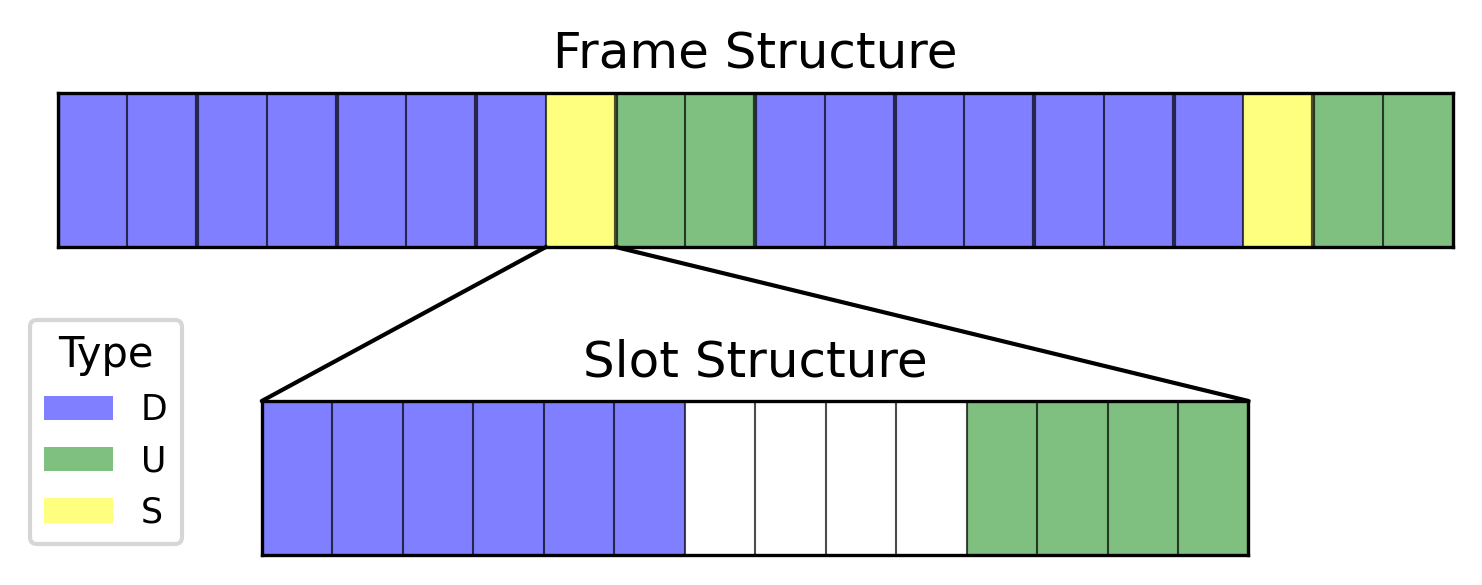

In [3]:
# Example 1

# TDD pattern
tdd_pattern = "DDDDDDDSUU"

# S slot configuration (you do not have to change this)
special_slot_pattern = "DDDDDD----UUUU"

# 0 = 15 kHz, 1 = 30 kHz, 2 = 60 kHz, 3 = 120 kHz
scs_index = 1

fig = plot_tdd_pattern(tdd_pattern=tdd_pattern,
                       s_pattern=special_slot_pattern,
                       scs_index=scs_index)

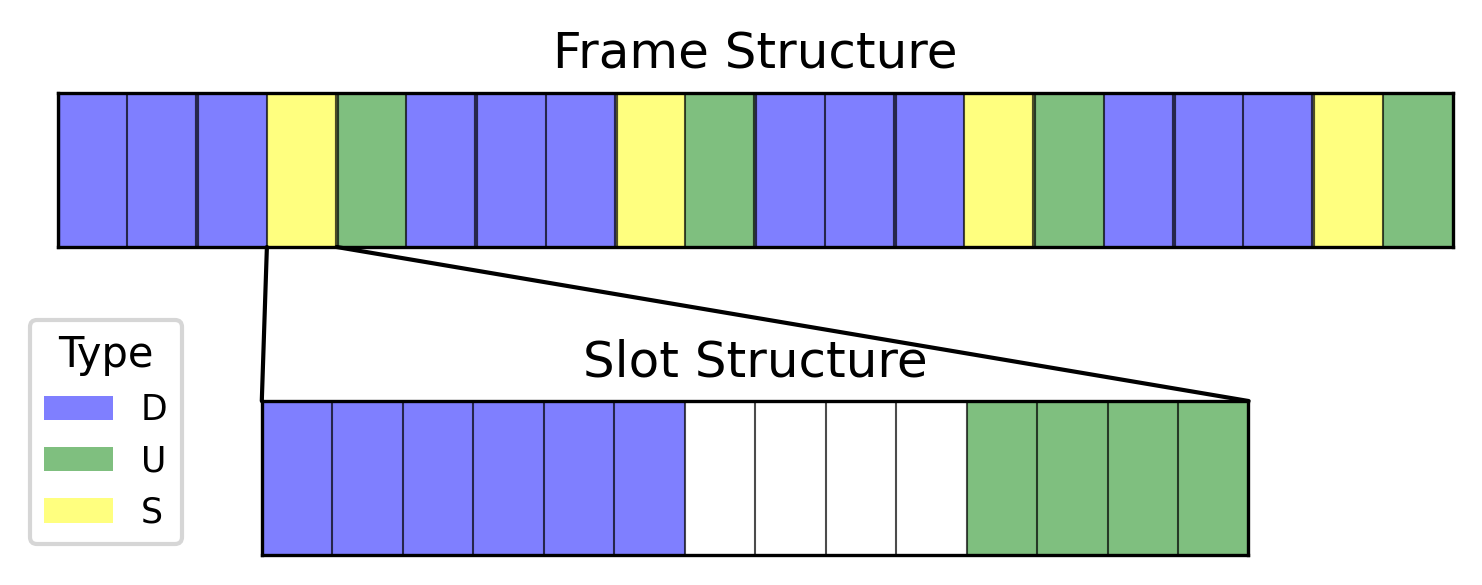

In [4]:
# Example 2

tdd_pattern = "DDDSU"

fig = plot_tdd_pattern(tdd_pattern=tdd_pattern,
                       s_pattern=special_slot_pattern,
                       scs_index=scs_index)

**Question**: What is the remaining white space in the Special (S) slot called, and what is its function?

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Are any of the two example TDD patterns a good fit for your system? Why (not)?

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Choose a TDD pattern that you will use in your network. You can choose one of the above TDD patterns, or create your own, as long as you provide your rationale (you don't have to configure the symbol structure of the S slot; just use the provided one).

**Answer**: <span style="color:red">**TODO**</span>

**Question**: How many time resources (expressed in a ratio or percentage) does your TDD pattern assign to the UL direction?

**Answer**: <span style="color:red">**TODO**</span>

### RF Configuration (Cont.)

**Question**: Using the parameters defined above, as well as the target UL data rate you defined in the previous lab, calculate the theoretical Channel Quality Indicator (CQI) index that would be required to support your use case, and derive the required SINR from it using the table below. 

*Note: don't forget that you are using TDD!*

**Answer**: <span style="color:red">**TODO**</span>

**Table 1**: Lookup table for mapping SINR estimate to modulation scheme and coding rate
|CQI index | Modulation | Coding rate | Spectral efficiency ($\mathrm{bps}/\mathrm{Hz}$) | SINR estimate ($dB$) |
|----------|:----------:|:-----------:|:-----------------------------:|:------------------:|
| 1 | QPSK | 0.0762 | 0.1523 | -6.7 |
| 2 | QPSK | 0.1172 | 0.2344 | -4.7 |
| 3 | QPSK | 0.1885 | 0.3770 | -2.3 |
| 4 | QPSK | 0.3008 | 0.6016 | 0.2 |
| 5 | QPSK | 0.4385 | 0.8770 | 2.4 |
| 6 | QPSK | 0.5879 | 1.1758 | 4.3 |
| 7 | 16QAM | 0.3691 | 1.4766 | 5.9 |
| 8 | 16QAM | 0.4785 | 1.9141 | 8.1 |
| 9 | 16QAM | 0.6016 | 2.4063 | 10.3 |
| 10 | 64QAM | 0.4551 | 2.7305 | 11.7 |
| 11 | 64QAM | 0.5537 | 3.3223 | 14.1 |
| 12 | 64QAM | 0.6504 | 3.9023 | 16.3 |
| 13 | 64QAM | 0.7539 | 4.5234 | 18.7 |
| 14 | 64QAM | 0.8525 | 5.1152 | 21.0 |
| 15 | 64QAM | 0.9258 | 5.5547 | 22.7 |

## Link Budget Calculation

Now that your RF environment and parameters are well defined, you are ready for the next step, which is called *link budget analysis*. The main goal of defining a link budget is to calculate the received signal power, based on all the power gains and losses in the network. This will eventually allow you to analyze the expected performance of your network. The image below represents how a link budget analysis is done, using the different power gains ans losses throughout the whole network.

![Link budget calculation: power in a wireless system](images/link_budget.jpg)

**Question**: Choose a suitable wireless channel propagation model and provide your rationale. You may use one from the table below, providing it fits your environment and use case, or you may find your own.

**Answer**: <span style="color:red">**TODO**</span>

**Table 2**: Commonly used wireless channel propagation models
| Model				| Frequency range ($\mathrm{MHz}$) | Recommended use |
|:------------------|:---------------------:|:----------------|
| COST-231			| 800-2000		| 0.02 < d < 5 km, UMTS, GSM1800, LTE
| Erceg-Greenstein	| 1900-6000		| 0.1 < d < 8 km, Fixed 
| IMT-2000			| 800-2800		| Indoor office, vehicular, outdoor to indoor 
| ITU-526			| 30-1000		| Fixed 
| ITU-529			| 300-1500		| 1 < d < 100 km, GSM900, CDMA2000, 
| ITU-1411			| 300-100000	| 0.005 < d < 1 km, short-range 
| ITU-1546      		| 30-4000		| 1 < d < 1000 km
| Okumura-Hata		| 150-2200		| 1 < d < 20 km, GSM900, CDMA2000, 
| WLL				| 30-10000		| Fixed receivers, Microwave Links, WiMAX

**Question**: Using your chosen propagation model and the distances you derived from the map in the previous lab, compute the path loss and derive minimum and maximum power levels in UL and DL (see the image above).

**Answer**: <span style="color:red">**TODO**</span>

**Question**: Calculate the UL SINR at the RSU. How does it compare to the estimated SINR you calculated earlier?

**Answer**: <span style="color:red">**TODO**</span>